# 6 线性模型选择与正则化

## 6.3 降维方法


- 之前讨论的方法（子集选择、压缩估计）均是用原始预测变量拟合模型。
- 降维方法是将预测变量进行转换，然后用转换之后的变量拟合最小二乘模型的方法。


##### 数学推导

假定我们有 $p$ 个原始变量，则标准线性模型为：
$$
 Y = \beta_0 + \beta_1X_1 + ... + \beta_pX_p + \epsilon
$$  

令 $Z_1$, $Z_2$, ..., $Z_M$  表示 $M$  个原始预测变量的线性组合，且 $M<p$ 。 即： 
$$Z_m=\sum \limits_{j=1}^p \phi_{jm}X_{j}  \qquad  (6.16) $$
其中 $\phi_{1m}$, $\phi_{2m}$..., $\phi_{pm}$ 是常数，$m=1$,..., $M$。  

我们可以用最小二乘拟合线性回归模型：
$$y_{i}=\theta_0+\sum \limits_{m=1}^M \theta_{m}z_{im}+\epsilon_{i}, \quad  i=1,...,n   \qquad  (6.17) $$


降维则是指通过某种方法可以使估计 $p+1$ 个系数 $\beta_0$, $\beta_1$,..., $\beta_p$ 的问题简化为估计 $M + 1$ 个系数 $\theta_0$, $\theta_1$, ..., $\theta_{M}$ 的问题($M < p$)。 

也就是说，问题的维度从 $p+1$ 降至 $M+1$。

注意公式 (6.16)

$$ \sum \limits_{m=1}^M \theta_{m}z_{im}=\sum \limits_{m=1}^M \sum \limits_{j=1}^p \theta_{jm} x_{ij} = \sum \limits_{j=1}^p \sum \limits_{m=1}^M \theta_{m} \phi_{jm} x_{ij} = \sum \limits_{j=1}^p \beta_{j} x_{ij}$$

显然

$$\beta_{j}=\sum \limits_{m=1}^M \theta_{m} \phi_{jm}   \qquad  (6.18) $$

- 因此，式(6.17) 可以看做是原始线性回归模型的一个特例。降维起到约束系数$\beta_j$的作用，所以系数拥有式(6.18) 的形式。

- 系数形式上的约束很可能使估计结果有偏。但当$p>>n$时，选择一个$M<<p$可以显著地降低拟合系数的方差。

- 如果 $M=p$ ，所有的 $Z_m$ 线性无关，那么式(6.18) 其实没有施加任何约束。这种情况并没有实现降维，所以式(6.17)等同于在原先$p$个变量上进行最小二乘拟合。

综上，所有的降维方法都分为两步，第一步是将原始$p$个变量转换为$M$个变量（$M<p$），第二步是用转换后的$M$个变量建立模型。转换变量的方法很多，这里介绍**主成分（principal components）** 和 **偏最小二乘（partial least squares）** 两种方法。



### 6.3.1 主成分回归


主成分分析 (principal components analysis，PCA) 是一种可以从多个变量中得到低维变量的有效方法。PCA 也可以当作无监督学习的一种工具，这里将它作为回归降维方法进行介绍。

#### 主成分分析综述


PCA 是一种对 $n×p$ 维数据矩阵$X$降维的技术。在第一主成分的方向上，数据变化最大。例如，图 6-14 表示了 100 个城市中， pop (人口规模)和某公司的 ad (广告支出)之间的关系。红色实线代表数据的第一主成分方向，在这个方向上数据的波动性最大。即如果把100个观测投影到此方向，那么投影的方差是最大的，投影在到其他方向的方差只会比这个小。

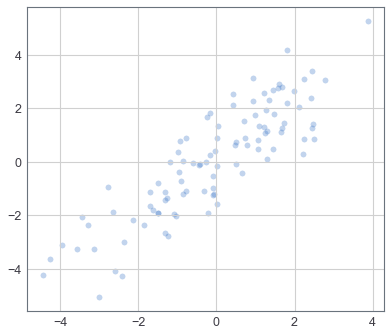

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from jupyterthemes import jtplot

jtplot.style(theme='grade3') # 选择画图主题

rng = np.random.RandomState(0)
n_samples = 100
cov = [[3, 3],
       [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X) # 系数代表保留的主成分个数

plt.scatter(X[:, 0], X[:, 1], alpha=.3, label='samples')

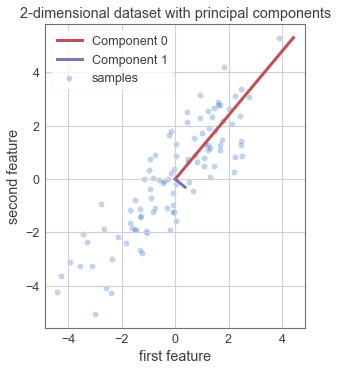

In [7]:
# 图6-14
plt.scatter(X[:, 0], X[:, 1], alpha=.3, label='samples')
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # 用方差贡献标准化主成分载荷
    plt.plot([0, comp[0]], [0, comp[1]], label=f"Component {i}", linewidth=3,
             color=f"C{i + 2}")
plt.gca().set(aspect='equal',
              title="2-dimensional dataset with principal components",
              xlabel='first feature', ylabel='second feature')
plt.legend()
plt.show()

第一主成分的图形表示如上图所示。若用数学表达，则可写为式（6.19）：
$$Z_1=0.839\times(pop-\overline{pop})+0.544\times(ad-\overline{ad})  \qquad(6.19)$$

对于变量中单个数据，可以写为式（6.20）:

$$Z_{i1}=0.839\times(pop_i-\overline{pop})+0.544\times(ad_i-\overline{ad})  \qquad(6.20)$$

##### 注：
- 在满足$\phi_{11}^2 + \phi_{21}^2 = 1$的条件下所有可能的$pop$ 和 $ad$ 线性组合里，上述组合将产生最大的方差，即： $Var(\phi_{11} \times (pop − \overline{pop}) + \phi_{21} \times (ad − \overline{ad}))$ 达到最大。
- $\phi_{11}^2 + \phi_{21}^2 = 1$ 的条件必须满足，否则可以人为增大主成分载荷来增大方差。

主成分分析有另一种解释:第一主成分向量定义了与数据最接近的那条线。在上述例子中，第一主成分线使得所有点到该线的垂直距离平方和最小。

可以将主成分$Z_1$看做是在每个位置上对 $pop$ 和 $ad$ 的数值汇总。在本例中，可以通过式（6.20）计算的$Z_{i1}$与0比较来判断城市人口规模和广告支出是高于还是低于平均水平。

下图显示了$Z_{i1}$与$pop$ 和 $ad$ 的关系，并且有力说明了第一主成分与两个变量高度相关。也就是说，第一主成分捕捉到了 $pop$ 和 $ad$ 两个变量所包含的大部分信息。

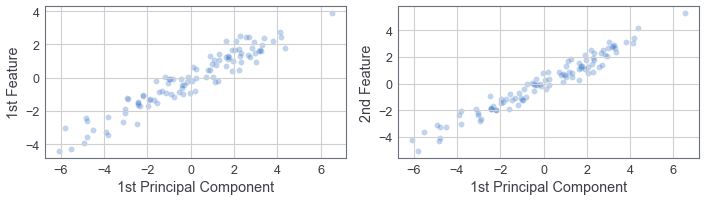

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), X[:, 0], alpha=.3)
axes[0].set(xlabel='1st Principal Component', ylabel='1st Feature')
axes[1].scatter(X.dot(pca.components_[0]), X[:, 1], alpha=.3)
axes[1].set(xlabel='1st Principal Component', ylabel='2nd Feature')
plt.tight_layout()
plt.show()

通常可以构造 $p$ 个不同的主成分。第二主成分 $Z_2$ 是所有与 $Z_1$ 无关的原始变量的线性组合中方差最大的。图 6-14 用紫色实线表示第二主成分的方向。 $Z_1$ 和 $Z_2$ 的零相关关系等价于 $Z1$ 的方向是垂直或者正交于 $Z_2$ 。第二主成分由下式给出:
$$Z_2=0.544\times(pop-\overline{pop})-0.839\times(ad-\overline{ad})$$

因为广告数据只有这两个预测变量，所以前两个主成分包含了 $pop$ 和 $ad$ 所有的信息。然而，构造过程使得第一主成分包含了大部分信息。从下图可以看出，第二成分与两个变量之间相关性很小，也就是说，只需第一主成分就可以准确代表$pop$ 和 $ad$。

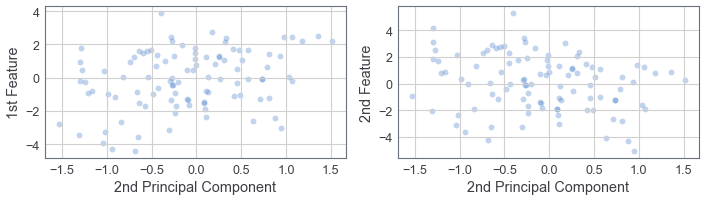

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[1]), X[:, 0], alpha=.3)
axes[0].set(xlabel='2nd Principal Component', ylabel='1st Feature')
axes[1].scatter(X.dot(pca.components_[1]), X[:, 1], alpha=.3)
axes[1].set(xlabel='2nd Principal Component', ylabel='2nd Feature')
plt.tight_layout()
plt.show()

#### 主成分回归方法


**主成分回归( principal components regression, PCR)** 是指构造前$M$ 个主成分 $Z_1$, ..., $Z_M$, 然后以这些主成分作为预测变量，再用最小二乘拟合线性回归模型。其主要思想是少数的主成分足以解释大部分的数据波动和数据与响应变量之间的关系。 
##### 注：
- 假设回归方程$Y$的方向就是 $X_1$, ..., $X_p$ 变动最剧烈的方向，但无法确保这个假设始终成立，所以为了得到良好的结果，常常需要合理的近似。
- 如果主成分回归的假设条件成立，那么用$Z_1$, ..., $Z_M$拟合一个最小二乘模型的结果要优于用$X_1$, ..., $X_p$拟合的结果，因为大部分甚至全部与响应变量相关的数据信息都包含在主成分中，且估计 $M<<p$ 个系数会减轻过拟合。
- 在主成分回归中，主成分数量$M$一般通过交叉验证确定。
- 应用主成分回归时，通常在构造主成分之前对每个变量进行标准化处理。标准化保证了所有变量位于相同尺度上，如果不做标准化，方差较大的变量将在主成分中占主导地位，最终影响主成分回归模型。但若变量使用同一计量单位，则可以不进行标准化处理。

虽然主成分回归提供了一个用 $M<p$ 个预测变量进行回归的简单方法，但它不是特征提取方法。因为用于回归的 $M$ 个主成分都是全部 $p$ 个原始变量的线性组合。因此，尽管主成分分析在实践中效果不错，但当模型只包含特征变量的一个小子集时，它对模型的提升效果并不明显。从这个角度来看，主成分分析接近于岭回归。实际上，可以证明主成分回归和岭回归极其相似，甚至可以认为岭回归是连续型的主成分回归。

关于岭回归与PCR之间的关系可以参考：https://zhuanlan.zhihu.com/p/32500133 ，这里只简述代数部分。
![PCA](.\PCA-1.png)
![PCA](.\PCA-2.png)
![Ridge](.\Ridge-1.png)
![Ridge](.\Ridge-2.png)

最后我们对比上述二式，可以得到以下结论：

![Ridge](.\diff.png)

- 对于岭回归而言，惩罚系数$\lambda$对奇异值不同的维度的惩罚力度不同，当$\sigma_j^2$很小时，由于$\lambda$不变，$\sigma_j^2/(\sigma_j^2 + \lambda)$会很小，而相反，当$\sigma_j^2$很大时， $\sigma_j^2/(\sigma_j^2 + \lambda)$会趋近于1。
- 对于PCA，则一次性地暴力将所有奇异值小的维度设置为了0，而保留下来的维度系数保持为1。
- 岭回归相当于连续型的主成分回归，都可以通过消除数据矩阵 $X$ 的多重共线性来提升线性回归的效果，而连接他们的桥梁则是奇异值分解（SVD）。
- SVD详细理论参考：https://www.cnblogs.com/LeftNotEasy/archive/2011/01/19/svd-and-applications.html ，本文不再赘述。

### 6.3.2 偏最小二乘

主成分回归方法能够最大限度地代表预测变量$X_1$, ..., $X_p$的线性组合或方向。这些方向是通过无指导方法得到，因此响应变量 $Y$ 对选择主成方向并无帮助。也就是说，响应变量没有指导主成分的构造过程。这就给主成分回归带来一个弊端：无法保证那些很好地解释预测变量的方向同样可以很好地预测响应变量。

**偏最小二乘 (partial least squares, PLS)** 则是一种有指导的主成分回归替代方法。同主成分回归一样，偏最小二乘是一种降维手段，它将原始变量的线性结合 $Z_1$, ..., $Z_M$ 作为新的变量集，然后用这 $M$ 个新变量拟合最小二乘模型。与主成分回归不同，偏最小二乘通过有指导的方法进行新特征提取，也就是说，偏最小二乘利用了响应变量的信息筛选新变量。这不仅很好地近似了原始变量，还与响应变量相关，简单来说，偏最小二乘方法试图寻找一个可以同时解释响应变量和预测变量的方向。

下面说明如何计算第一个偏最小二乘方向$Z_1$。对 $p$个预测变量进行标准化之后，偏最小二乘方法把式 (6.16) 中各系数 $\phi_{j1}$ 设定为$Y$ 对 $X_j$简单线性回归的系数。可以证明此系数同$Y$ 和 $X_j$ 的相关系数成比例。因此，在计算 $Z_1=\sum \limits_{j=1}^p \phi_{ji}X_j$ 时，偏最小二乘将最大权重赋给与响应变量相关性最强的变量。

为确定第二个 $PLS$ 方向，首先用 $Z_1$ 中的每个变量对 $Z_1$ 做回归，取其残差来调整每个变量。残差可以认为是没有被第一 $PLS$ 方向解释的剩余信息。然后利用这些正交( thogonalized) 数据计算 $Z_2$ ，形式上同基于原始数据计算 $Z_1$ 的完全一致。这个迭代过程重复进行 $M$ 次来确定多个 $PLS$ 成分 $Z_l$ ,..., $Z_M$ 。最后，与主成分回归一样，用 $Z_1$, ..., $Z_M$ 拟合线性最小二乘模型来预测 $Y$ 。

同主成分回归一样，偏最小二乘方向的个数 $M$ 也是一个需要调整的参数，一般通过交叉验证选择。一般情况下，偏最小二乘回归前应对预测变量和响应变量标准化处理。


## 6.4 高维问题


### 6.4.1 高维数据

大多数用于回归和分类的传统统计方法是在低维情况下发展而来，也就是观测数 $n$ 远大于特征数 $p$ 。这是因为在大部分领域的历史中，需要使用统计方法的科学问题一直处于低维水平。

过去的 20 年，新技术改变了金融、市场和医学等领域中数据收集的方式。现在收集无限量的 ( $p$ 非常大)特征数据已经很常见。显然， $p$ 可以很大，但是观测数 $n$ 却常常由于成本、抽样能力和其他因素受到限制。

特征数比观测数大的数据被称做高维数据。线性最小二乘回归这类传统方法不再适合解决这种情况。分析高维数据时产生的许多问题在 $n>p$ 时也会出现，这些问题包括方差-偏差平衡、 过拟合等。尽管这些问题常常是相关的，但当变量数目远大于观测数目时，它们变得尤其重要。

注意，在进行有指导学习时，所讨论内容也适用于变量数 $p$ 略小于观测数 $n$ 的情况。

### 6.4.2 高维度下出现的问题

当变量个数 $p$ 大于、等于或者略小于观测数 $n$ 时，最小二乘法将无法使用，因为不管特征变量与响应变量是否真正存在关系，最小二乘估计的系数都能很好地拟合数据，而且模型的残差为零。

例如，假设特征变量 $p=1$ ,当有20个观测值时， $n>p$，最小二乘回归线没有很好地拟合数据，但已经尽可能靠近20个观测值。另一方面，当只有2个观测值时，不管观测的数值如何，回归线总可以精确地拟合数据（即两点之间的连线），而这几乎必然导致过拟合问题。也就是说，虽然它可以很好地拟合高维的训练数据，但是得到的线性模型在独立的测试数据集上将表现很差，所以这样的模型并不是有用的。


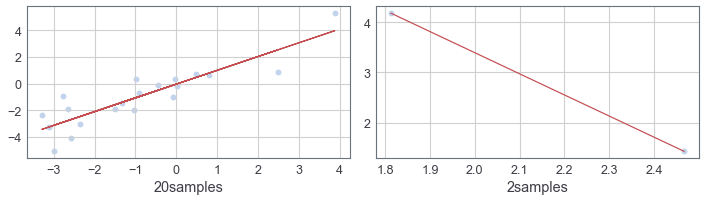

In [29]:
import statsmodels.api as sm 

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

rng = np.random.RandomState(0)
cov = [[3, 3],
       [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=20)
Y = rng.multivariate_normal(mean=[0, 0], cov=cov, size=2)

est1 = sm.OLS(X[:, 1], sm.add_constant(X[:, 0])).fit()
X_hat = est1.predict(sm.add_constant(X[:, 0]))

est2 = sm.OLS(Y[:, 1], sm.add_constant(Y[:, 0])).fit()
Y_hat = est2.predict(sm.add_constant(Y[:, 0]))

axes[0].scatter(X[:, 0], X[:, 1], alpha=.3, label='samples')
axes[0].plot(X[:, 0], X_hat, color = 'r' )
axes[0].set(xlabel='20samples')

axes[1].scatter(Y[:, 0], Y[:, 1], alpha=.3, label='samples')
axes[1].plot(Y[:, 0], Y_hat, color = 'r' )
axes[1].set(xlabel='2samples')
plt.tight_layout()
plt.show()


### 6.4.3-6.4.4 高维数据的回归及分析结果解释

事实证明，本章所介绍的向前逐步选择、岭回归、lasso和主成分回归等用于拟合有偏最小二乘模型的方法，在高维回归中作用很大。与标准最小二乘法相比，这些方法有效地避免了过拟合问题。

使用 lasso 、岭回归或其他降维回归过程拟合高维数据时，必须非常谨慎地解释模型的结果。在高维情况下，存在非常极端的共线性问题:模型中的任何一个变量都可以写成其他所有变量的线性组合。实际上这就意味着我们无法准确地知道哪个变量(如果存在)可以预测输出变量，也无法确定最优系数。我们最多可以做到的是增大那些可以预测输出变量的变量系数。

在解释高维数据拟合模型的误差和拟合效果时，也应特别注意。前面提到，当 $p>n$ 时很容易得到一个残差为零的但是没有用的模型。 因此，绝对不能在训练数据集上用误差平方和、 $p$值、 $R^2$ 统计量或者其他传统的对模型拟合效果的度量方法来证明高维情况下模型拟合的效果。例如，在上述例子中，当 $p\approx n$ 时，我们得到了 $R^2=1$的模型。这个现象可能会误导其他人认为已经得到了一个统计有效、可以使用的模型，然而事实并非如此。

重要的是在独立的测试集进行验证或者进行交叉验证。

## 6.7 PCR与PLS回归

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

### 6.7.1 PCR

首先针对sklearn包介绍其中的PCA函数。（参考网址：https://blog.csdn.net/u012102306/article/details/52294726 ）

**一**、函数

sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False) 

##### 关于参数：
- n_components：PCA算法中所要保留的主成分个数n，也即保留下来的特征个数n，int 或者 string，缺省时默认为None，所有成分被保留。赋值为int，比如n_components=1，将把原始数据降到一个维度。赋值为string，比如n_components='mle'，将自动选取特征个数n，使得满足所要求的方差百分比。
- copy:类型为bool，True或者False，缺省时默认为True。意义：表示是否在运行算法时，将原始训练数据复制一份。若为True，则运行PCA算法后，原始训练数据的值不会有任何改变，因为是在原始数据的副本上进行运算；若为False，则运行PCA算法后，原始训练数据的值会改，因为是在原始数据上进行降维计算。
- whiten：白化，类型为bool，表示每个特征的标准偏差是否一致，默认为False。

**二**、重要对象属性

- components_：返回具有最大方差的成分。
- explained_variance_ratio_：返回 所保留的n个成分各自的方差百分比。
- n_components_：返回所保留的成分个数n。

**三**、重要对象方法

- fit(X,y=None)：PCA是无监督学习算法，此处y等于None。fit(X)表示用数据X来训练PCA模型。
- fit_transform(X)：用X来训练PCA模型，同时返回降维后的数据。
- inverse_transform()：将降维后的数据转换成原始数据。
- transform(X)：将数据X转换成降维后的数据。当模型训练好后，对于新输入的数据，都可以用transform方法来降维。

我们现在将PCR应用于Hitters的数据来预测薪水。

In [3]:
df = pd.read_csv('C:/Users/ASUS/Desktop/Hitters.csv').dropna().drop('Player', axis=1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [5]:
y = df.Salary

# 删除响应变量及字符型变量（用于创建虚拟变量）
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# 合并浮点型预测变量及虚拟预测变量
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

pca = PCA()
X_reduced = pca.fit_transform(scale(X))

# 方差最大的前四个主成分
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.198290,-0.383784,0.088626,0.031967,0.028117,-0.070646,0.107044,0.269810,-0.012183,0.145621,0.097328,0.103150,-0.039850,0.306248,0.532433,-0.510331,0.139342,-0.106790,0.053777
1,0.195861,-0.377271,0.074032,0.017982,-0.004652,-0.082240,0.130026,0.388722,-0.061604,0.130476,0.014433,0.121009,0.003593,0.210616,-0.023442,0.720168,-0.167363,0.043568,-0.097782
2,0.204369,-0.237136,-0.216186,-0.235831,0.077660,-0.149646,-0.505833,-0.226278,0.127422,-0.351111,-0.202190,-0.314852,-0.108689,-0.001353,0.355455,0.200408,0.047702,-0.058377,-0.024805
3,0.198337,-0.377721,-0.017166,-0.049942,-0.038536,-0.136660,0.201764,0.114518,-0.171230,0.032245,-0.312187,-0.321700,-0.381219,-0.266583,-0.468300,-0.220518,0.140946,0.047050,0.059145
4,0.235174,-0.314531,-0.073085,-0.138985,0.024299,-0.111675,-0.319440,0.005082,0.131146,-0.172233,0.243415,0.347752,0.440143,-0.007486,-0.461468,-0.237366,-0.106688,0.063998,0.019351


In [51]:
# 主成分对方差贡献比例
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([38.31, 60.15, 70.84, 79.03, 84.29, 88.63, 92.26, 94.96, 96.28,
       97.25, 97.97, 98.64, 99.14, 99.46, 99.73, 99.88, 99.95, 99.98,
       99.99])

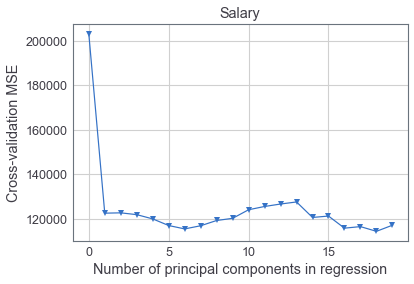

In [52]:
# 10折交叉验证
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# 计算没有主成分时的MSE
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# 逐次加入主成分，计算MSE
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-validation MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

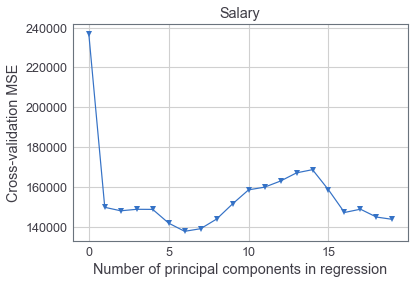

In [53]:
pca2 = PCA()

# 分离训练集和测试集
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# 数据标准化处理
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10折交叉验证
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

# 计算没有主成分时的MSE
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# 逐次加入主成分，计算MSE
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('Cross-validation MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [59]:
X_reduced_test = pca2.transform(scale(X_test))[:,:6]

# 训练训练集模型 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:6], y_train)

# 对测试集进行预测并计算MSE
pred = regr.predict(X_reduced_test)
mean_squared_error(pred, y_test)

112167.15685435767

### 6.7.2 PLS

同样介绍针对sklearn中的PLS。（参考：https://blog.csdn.net/u013045749/article/details/50310637 ）

**一**、函数

sklearn.cross_decomposition.PLSRegression(n_components=2, *, scale=True, max_iter=500, tol=1e-06, copy=True)

##### 关于参数：
- n_components：PLS算法中所要保留的特征个数n，默认为2。
- scale:类型为bool,是否要将数据进行缩放，默认为True。 
- max_iter:类型为int，默认为500，表示NIPALS内循环的最大迭代次数。
- tol：非负实数，默认为1e-06，表示迭代算法的容忍度，即迭代终止条件。
- copy:类型为bool，True或者False，缺省时默认为True。意义：表示是否在运行算法时，将原始训练数据复制一份。若为True，则运行PCA算法后，原始训练数据的值不会有任何改变，因为是在原始数据的副本上进行运算；若为False，则运行PCA算法后，原始训练数据的值会改，因为是在原始数据上进行降维计算。


**二**、对象属性及方法

- 对象属性主要包含：向量形式：x_weights_（迭代的交叉协方差矩阵的左奇异向量）；y_weights_（迭代的交叉协方差矩阵的右奇异向量）；x_loadings_（x的成分载荷）；y_loadings_（y的成分载荷）等，矩阵形式：T（x_scores_，从自变量中选择对因变量解释力度最高的主成分）； U（y_scores_，通过T得到预测项U，因变量提取出的主成分）； W（x_weights_，每个提取出的自变量主成分的权重）；C（y_weights_，每个提取出的因变量主成分的权重）；P（ x_loadings_， X的负荷矩阵）；Q（y_loadings_，Y对应于U的负荷矩阵）。
- 对象方法与PCA类似，即fit(X,Y);fit_transform(X, y=None);transform(X, Y=None, copy=True)等，注意输入变量Y与PCA中的不同。
- scikit-learn包PLSRegression指导手册：https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html 。



同样将PLS应用于Hitters的数据来预测薪水。

(-1.0, 19.9)

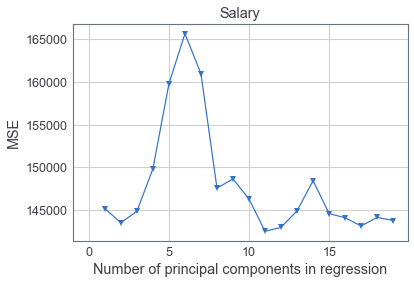

In [55]:
n = len(X_train)

# 10折交叉验证
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [56]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

104838.51042760804